In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [52]:
# state Medicaid enrollment numbers by state

#reading in cms enrollment data
enroll_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/cms_enrollment_dta.csv")
enroll_dta=enroll_dta[enroll_dta['final_report'] == "Y"]
enroll_dta=enroll_dta[['state_name', "report_date", "state_expanded_medicaid", "total_medicaid_enrollment"]]
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('N','Did not expand')
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('Y','Expanded')
enroll_dta.rename(columns={"state_name":"State", "state_expanded_medicaid": "Medicaid Expansion Status", "total_medicaid_enrollment":"Total Medicaid Enrollment"}, inplace=True)  #renaming the columns
#enroll_dta['state_expanded_medicaid'] = pd.to_numeric(enroll_dta['state_expanded_medicaid'], downcast="float")

enroll_dta

,State,report_date,Medicaid Expansion Status,Total Medicaid Enrollment
0,Alabama,2013-09-01,Did not expand,NaN
2,Alabama,2017-06-01,Did not expand,731915.0
4,Alabama,2017-07-01,Did not expand,735619.0
6,Alabama,2017-08-01,Did not expand,734934.0
8,Alabama,2017-09-01,Did not expand,734507.0
...,...,...,...,...
4743,Wyoming,2021-01-01,Did not expand,60770.0
4745,Wyoming,2021-02-01,Did not expand,61839.0
4746,Wyoming,2021-03-01,Did not expand,62659.0
4749,Wyoming,2021-04-01,Did not expand,63440.0


In [53]:
may2021=enroll_dta[enroll_dta.report_date=="2021-05-01"]

In [54]:
may2021=may2021.reset_index()

In [55]:
may2021=may2021[["State", "Total Medicaid Enrollment","Medicaid Expansion Status"]]
may2021

,State,Total Medicaid Enrollment,Medicaid Expansion Status
0,Alabama,854004.0,Did not expand
1,Alaska,234706.0,Expanded
2,Arizona,1916492.0,Expanded
3,Arkansas,880279.0,Expanded
4,California,11514302.0,Expanded
5,Colorado,1497818.0,Expanded
6,Connecticut,933715.0,Expanded
7,Delaware,255645.0,Expanded
8,District of Columbia,250354.0,Expanded
9,Florida,4122539.0,Did not expand


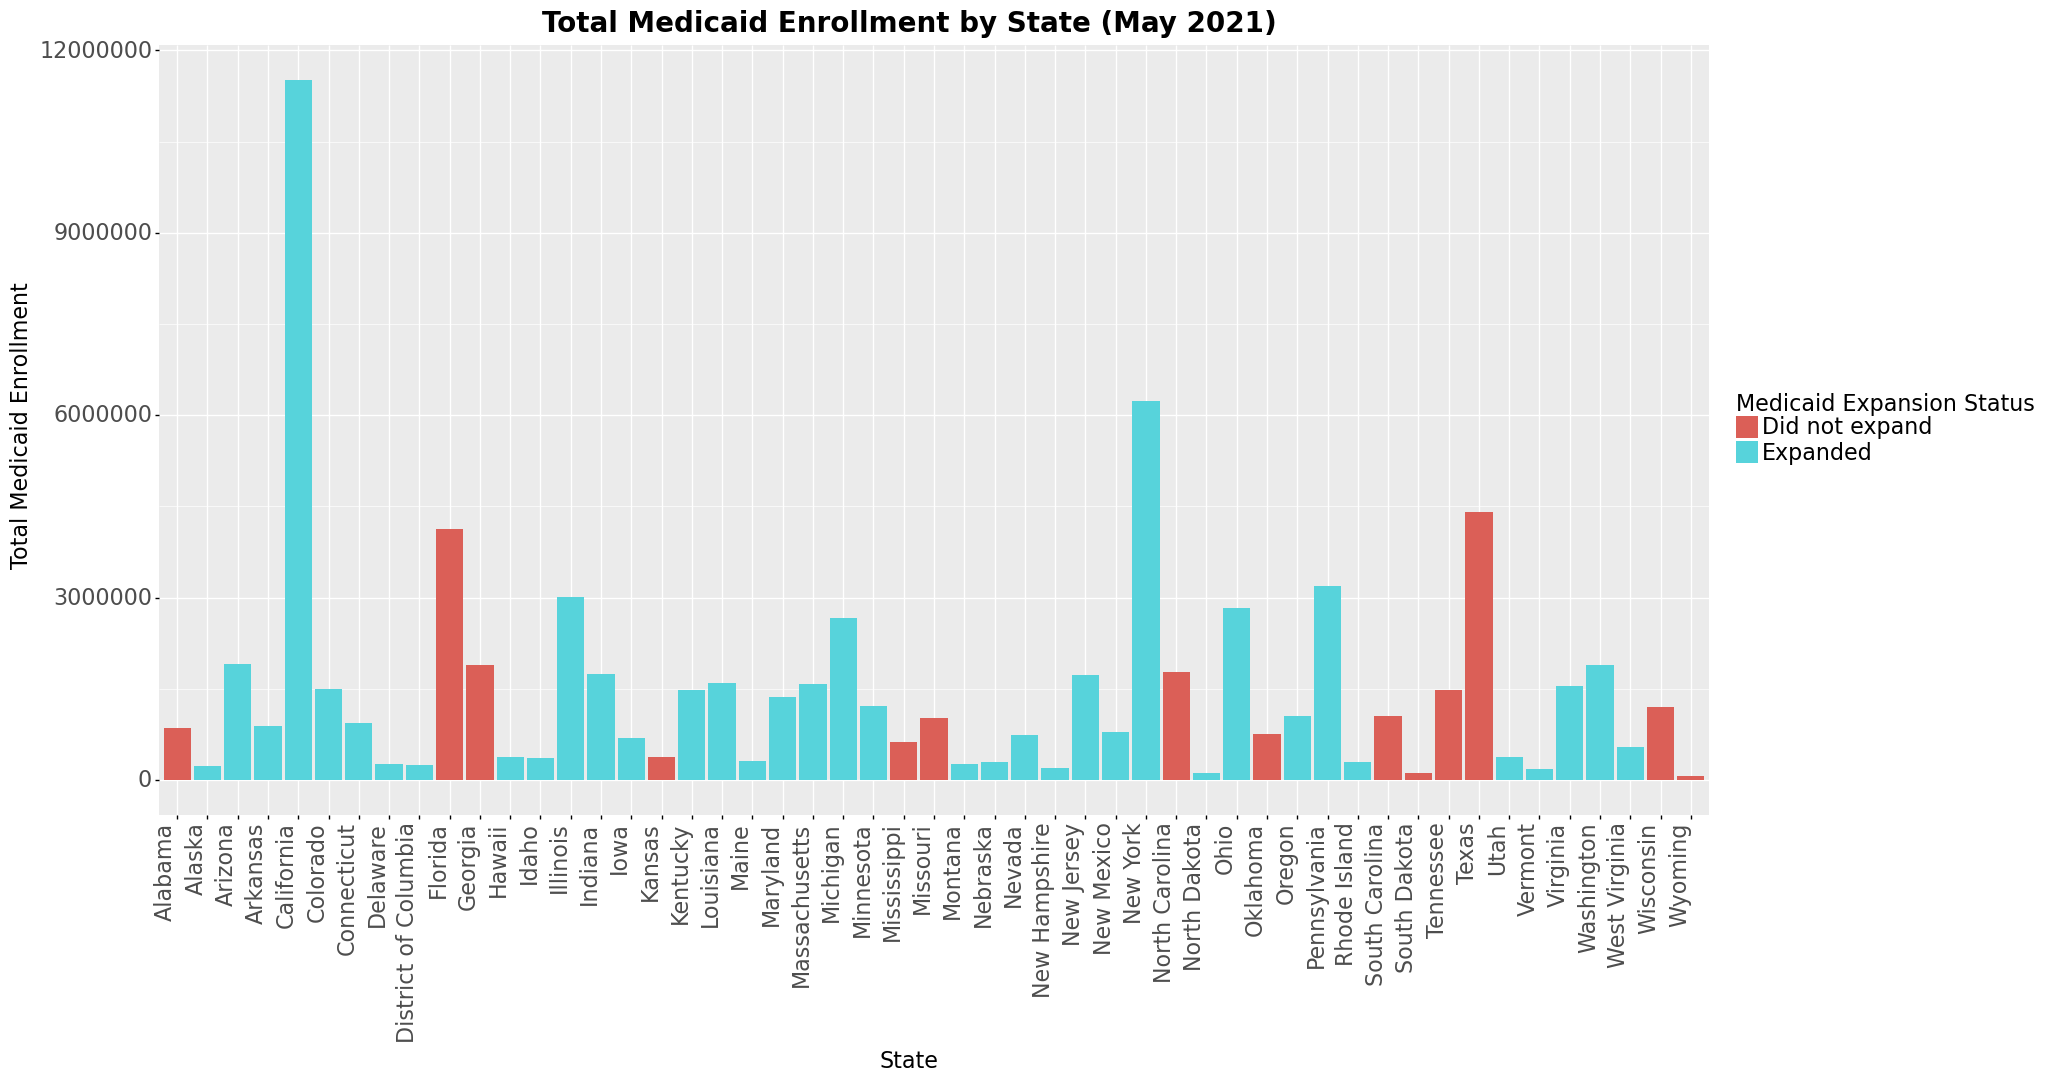

<ggplot: (8777137094247)>

In [61]:
(ggplot(may2021,aes(x='State', y="Total Medicaid Enrollment", fill="Medicaid Expansion Status")) +
  geom_col() + 
theme(figure_size=(20, 10)) + 
theme(axis_text_x=element_text(rotation=90, hjust=1, size=16)) +
theme(axis_text_y=element_text(size=16)) +
theme(axis_title=element_text(size=16)) +
theme(legend_text=element_text(size=16), legend_title=element_text(size=16)) +
ggtitle("Total Medicaid Enrollment by State (May 2021)")+
theme(plot_title = element_text(size = 20, face = "bold")))

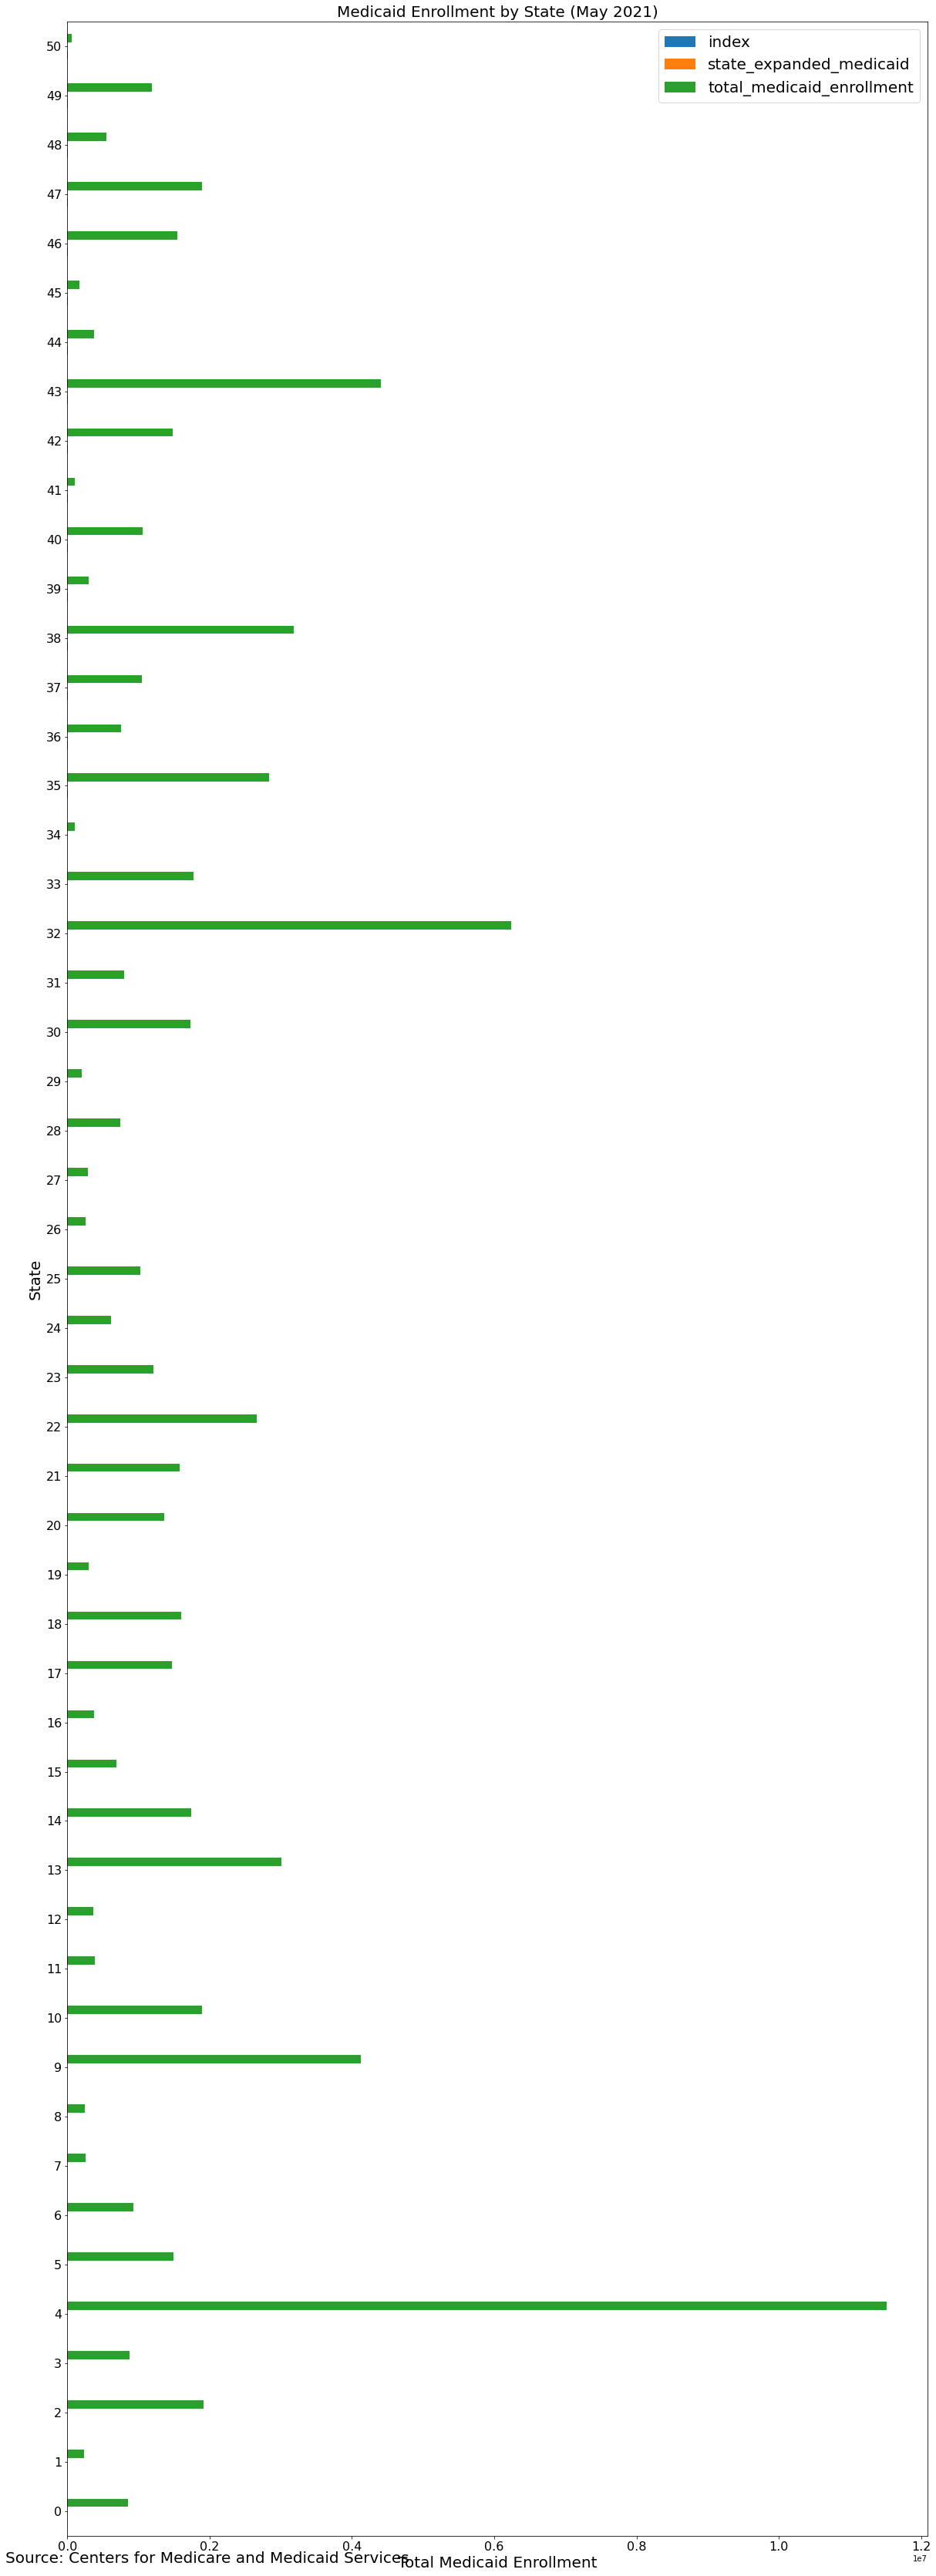

In [13]:
may2021.plot(kind="barh", figsize=(20,60))  #creating a stacked bar chart based on queried data
plt.title("Medicaid Enrollment by State (May 2021)", fontsize=20)  #adding a plot title
plt.ylabel("State", fontsize=20)  #adding a y axis label
plt.xlabel("Total Medicaid Enrollment", fontsize=20)  #adding an x axis label
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=20)
plt.annotate("Source: Centers for Medicare and Medicaid Services", (0,0), (-80,-20), fontsize=20, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [105]:
elig_det_dta_19=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_dta2019.csv")
nat_total_19=elig_det_dta_19[elig_det_dta_19.State== "National Total"]
nat_total_19=nat_total_19.groupby("State")
nat_mean_19=nat_total_19.mean()
nat_mean_19=nat_mean_19.reset_index()
nat_mean_19[['Percent of Determinations Processed\n< 24 hours', "Percent of Determinations Processed\n1 - 7 Days", "Percent of Determinations Processed\n8 - 30 Days", "Percent of Determinations Processed\n31- 45 Days", "Percent of Determinations Processed\n45+ Days"]]*100

nat_mean_19.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
nat_mean_19['Percent of Determinations Processed within 24 Hours']=nat_mean_19['Percent of Determinations Processed within 24 Hours']*100
nat_mean_19['Percent of Determinations Processed Between 1 and 7 Days']=nat_mean_19['Percent of Determinations Processed Between 1 and 7 Days']*100
nat_mean_19['Percent of Determinations Processed Between 8 and 30 Days']=nat_mean_19['Percent of Determinations Processed Between 8 and 30 Days']*100
nat_mean_19['Percent of Determinations Processed Between 31 and 45 Days']=nat_mean_19['Percent of Determinations Processed Between 31 and 45 Days']*100
nat_mean_19['Percent of Determinations Processed After 45 Days']=nat_mean_19['Percent of Determinations Processed After 45 Days']*100



nat_mean_19.set_index(['State'])

,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
State,,,,,
National Total,39.6,14.55,23.6,7.05,15.2


In [107]:
nat_mean_19_t=nat_mean_19.transpose()
nat_mean_19_t

,0
State,National Total
Percent of Determinations Processed within 24 Hours,39.6
Percent of Determinations Processed Between 1 and 7 Days,14.55
Percent of Determinations Processed Between 8 and 30 Days,23.6
Percent of Determinations Processed Between 31 and 45 Days,7.05
Percent of Determinations Processed After 45 Days,15.2


In [109]:
nat_mean_19_t.plot(kind="bar", figsize=(15,10))

TypeError: no numeric data to plot

<AxesSubplot:xlabel='State'>

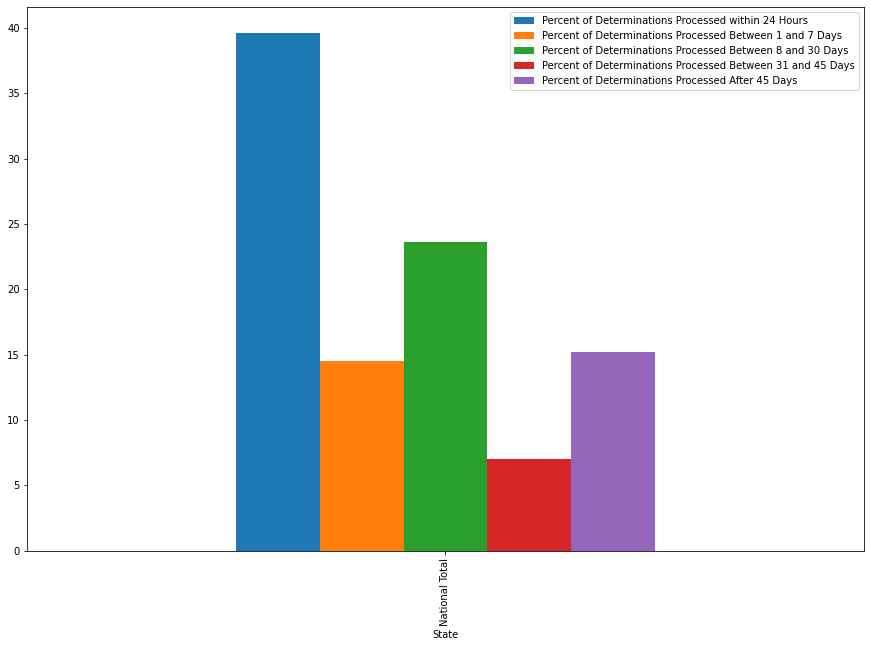

In [90]:
#(ggplot(nat_mean_19,aes(x="State", y=["Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed After 45 Days"])) +
  #geom_bar()) #+ 
#theme(figure_size=(20, 10)) + 
#theme(axis_text_x=element_text(rotation=90, hjust=1, size=16)) +
#theme(axis_text_y=element_text(size=16)) +
#theme(axis_title=element_text(size=16)) +
#theme(legend_text=element_text(size=16), legend_title=element_text(size=16)) +
#ggtitle("Total Medicaid Enrollment by State (May 2021)")+
#theme(plot_title = element_text(size = 20, face = "bold")))

nat_mean_19.plot(x="State", y=["Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed After 45 Days"], kind="bar", figsize=(15,10))

<AxesSubplot:xlabel='State'>

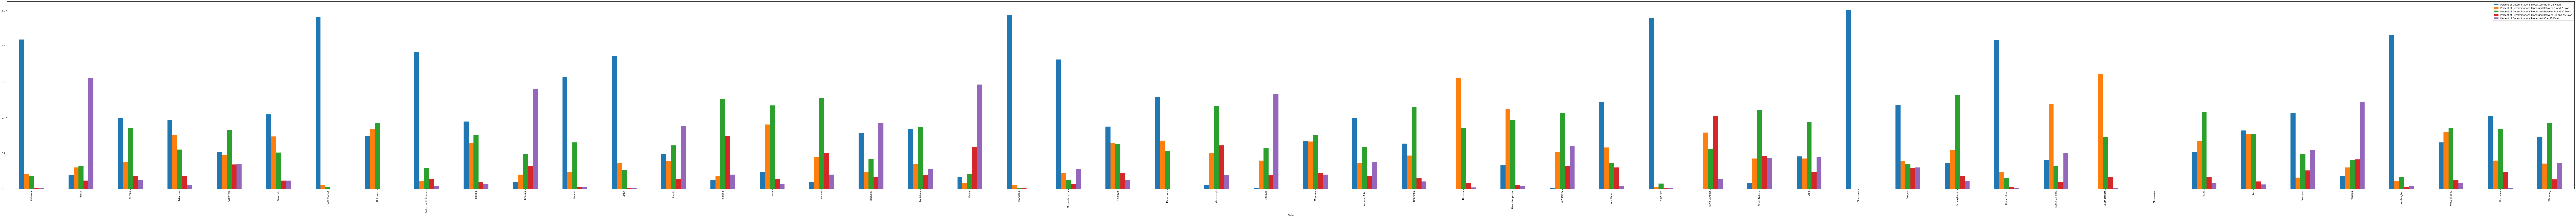

In [87]:
grouped_19 = elig_det_dta_19.groupby("State")
means_19 = grouped_19.mean()

means_19 = means_19.reset_index()
means_19.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns

means_19.plot(x="State", y=["Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed After 45 Days"], kind="bar", figsize=(200,15))